## **Multiple Polynomial Regression (Automobile dataset)**

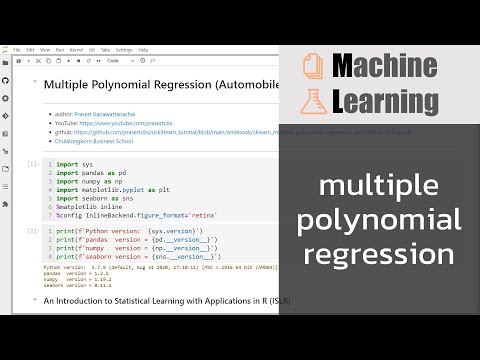

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('fJ-Z3X1bbvs', width=720, height=405)

In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
print(f'Python  version:  {sys.version}')
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

Python  version:  3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1
2021-05-16 03:13:47.068050


# An Introduction to Statistical Learning with Applications in R (ISLR)
"An Introduction to Statistical Learning, with applications in R" (Springer, 2013) with permission from the authors: G. James, D. Witten, T. Hastie and R. Tibshirani"

http://www-bcf.usc.edu/~gareth/ISL/index.html


In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Auto.csv'
df=pd.read_csv(url, na_values='?')
df.sample(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
207,20.0,4,130.0,102.0,3150,15.7,76,2,volvo 245
348,37.7,4,89.0,62.0,2050,17.3,81,3,toyota tercel
122,24.0,4,121.0,110.0,2660,14.0,73,2,saab 99le
119,20.0,4,114.0,91.0,2582,14.0,73,2,audi 100ls
129,31.0,4,79.0,67.0,1950,19.0,74,3,datsun b210
262,19.2,8,305.0,145.0,3425,13.2,78,1,chevrolet monte carlo landau
187,17.5,8,305.0,140.0,4215,13.0,76,1,chevrolet chevelle malibu classic
220,33.5,4,85.0,70.0,1945,16.8,77,3,datsun f-10 hatchback
224,15.0,8,302.0,130.0,4295,14.9,77,1,mercury cougar brougham
197,29.0,4,90.0,70.0,1937,14.2,76,2,vw rabbit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [7]:
df.dropna(inplace=True)

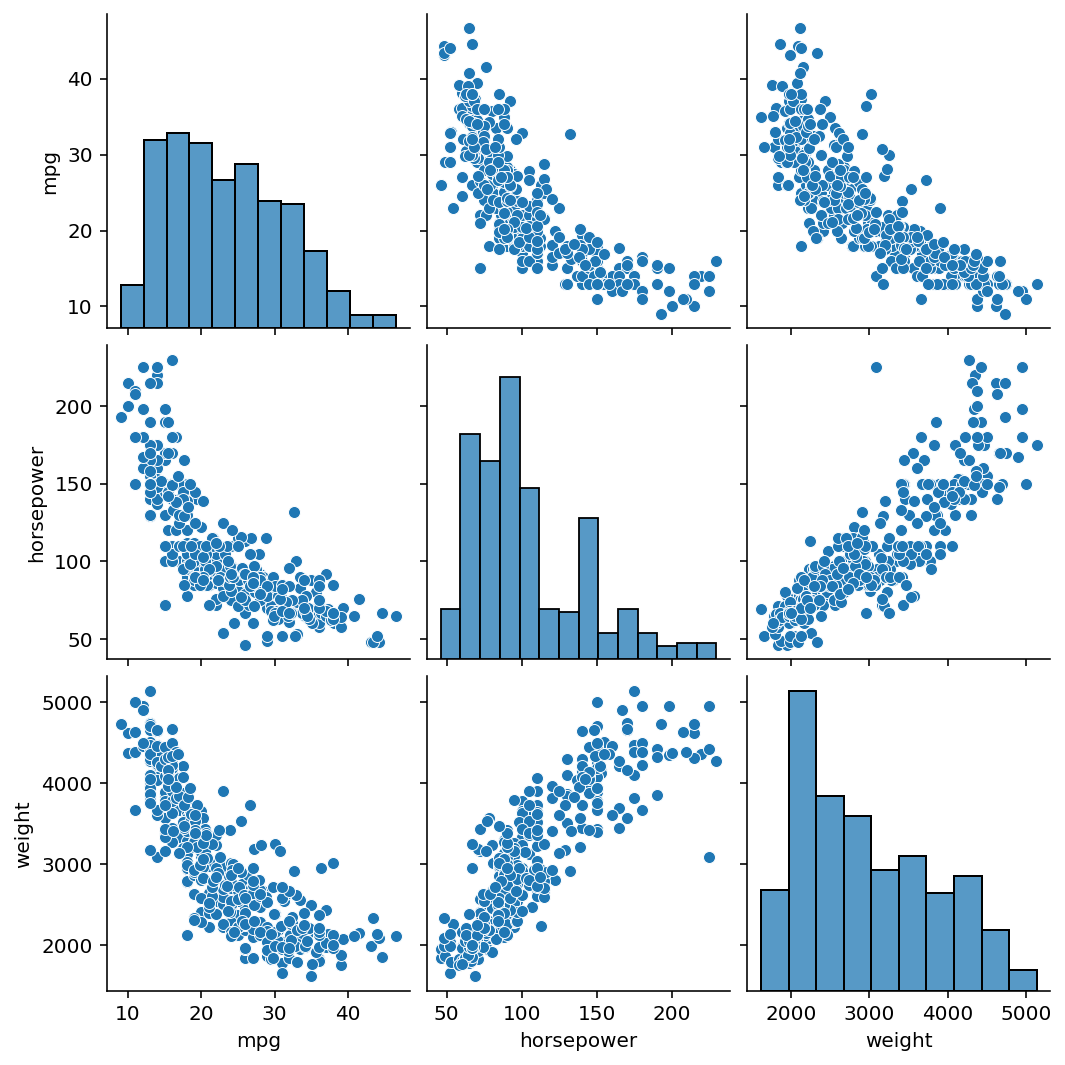

In [8]:
sns.pairplot(df[['mpg', 'horsepower', 'weight']])

In [9]:
df[['mpg', 'horsepower', 'weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


## **scikit-learn**

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
# x_col=['horsepower']
x_col=['horsepower', 'weight']
y_col='mpg'

In [12]:
X=df[x_col]
y=df[y_col]

In [13]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=1)

# multiple linear regression
$$
{y=\beta _{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}+\varepsilon}
$$

In [14]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.intercept_, lm.coef_

(44.822470583215576, array([-0.04898144, -0.00553451]))

In [17]:
lm.score(X_train, y_train) # R-squared

0.6932437089290188

In [18]:
lm.score(X_test, y_test) # R-squared

0.7292547386704167

**polynomial regression**

**multiple regression model**

$${y=\beta _{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}+\varepsilon}
$$

**general polynomial regression model**
$$
{y=\beta _{0}+\beta _{1}x^{1}+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,}
$$

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [21]:
X_train[:3]

,horsepower,weight
335,88.0,2500
396,82.0,2720
393,52.0,2130


In [22]:
X_train_poly[:3]

array([[1.0000e+00, 8.8000e+01, 2.5000e+03, 7.7440e+03, 2.2000e+05,
        6.2500e+06],
       [1.0000e+00, 8.2000e+01, 2.7200e+03, 6.7240e+03, 2.2304e+05,
        7.3984e+06],
       [1.0000e+00, 5.2000e+01, 2.1300e+03, 2.7040e+03, 1.1076e+05,
        4.5369e+06]])

In [23]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [24]:
X_train_poly[:1]

array([[1.000e+00, 8.800e+01, 2.500e+03, 7.744e+03, 2.200e+05, 6.250e+06]])

In [25]:
h=88
w=2500
1, h**1, w**1, h**2, h*w, w**2

(1, 88, 2500, 7744, 220000, 6250000)

In [26]:
pm.intercept_, pm.coef_

(60.99963811942506,
 array([ 0.00000000e+00, -2.71309036e-01, -8.77290010e-03,  2.15169279e-04,
         4.22566829e-05, -3.58954387e-08]))

In [27]:
pm.score(X_train_poly, y_train) # R-squared

0.7344640327916464

In [28]:
pm.score(X_test_poly, y_test) # R-squared

0.7734567578441669

In [29]:
X_test[:3]

,horsepower,weight
82,97.0,2506
167,75.0,2171
356,75.0,2350


In [30]:
X_test_poly[:3]

array([[1.000000e+00, 9.700000e+01, 2.506000e+03, 9.409000e+03,
        2.430820e+05, 6.280036e+06],
       [1.000000e+00, 7.500000e+01, 2.171000e+03, 5.625000e+03,
        1.628250e+05, 4.713241e+06],
       [1.000000e+00, 7.500000e+01, 2.350000e+03, 5.625000e+03,
        1.762500e+05, 5.522500e+06]])

In [31]:
pm.intercept_ + sum((pm.coef_ * X_test_poly[0]))

24.76871605890951

In [32]:
lm.predict(X_test[:3])

array([26.20179173, 29.13344391, 28.14276685])

In [33]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [34]:
y_test[:3]

82     23.0
167    29.0
356    32.4
Name: mpg, dtype: float64

In [35]:
X_test[:1]

,horsepower,weight
82,97.0,2506


In [36]:
pm.predict(poly.fit_transform([
    [97, 2506]
]))

array([24.76871606])

In [37]:
pm.predict(poly.fit_transform([
    [97, 2506],
    [75, 2171],
    [75, 2350]
]))

array([24.76871606, 29.52708203, 28.49498017])

In [38]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

# **general polynomial regression model**
$$
{y=\beta _{0}+\beta _{1}x^{1}+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,}
$$

## **pipeline¶**

In [39]:
from sklearn.pipeline import make_pipeline
degree=2
pm2=make_pipeline(PolynomialFeatures(degree), LinearRegression(), verbose=True)
pm2.fit(X_train, y_train)

[Pipeline]  (step 1 of 2) Processing polynomialfeatures, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=True)

In [40]:
pm2.get_params()

{'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False,
 'memory': None,
 'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                    order='C'),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                      order='C')),
  ('linearregression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 'verbose': True}

In [41]:
pm.score(X_train_poly, y_train)

0.7344640327916464

In [42]:
pm2.score(X_train, y_train)

0.7344640327916464

In [43]:
pm2.score(X_test, y_test)

0.7734567578441669

In [44]:
X_test[:3]

,horsepower,weight
82,97.0,2506
167,75.0,2171
356,75.0,2350


In [45]:
pm2.predict(X_test[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [46]:
pm2.predict([
    [97, 2506]
])

array([24.76871606])

In [47]:
pm2.predict([
    [97, 2506],
    [75, 2171],
    [75, 2350]
])

array([24.76871606, 29.52708203, 28.49498017])

In [48]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

# **statsmodels**
## **method 1 (using R formula style)¶**

In [49]:
dt=X_train.copy()
dt[y_col]=y_train
dt[:5]

,horsepower,weight,mpg
335,88.0,2500,35.0
396,82.0,2720,31.0
393,52.0,2130,44.0
29,88.0,2130,27.0
275,125.0,3140,17.0


In [50]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [51]:
import statsmodels.formula.api as smf
formula = 'mpg ~ horsepower + weight + I(horsepower**2) + horsepower * weight + I(weight**2)'
model1 = smf.ols(formula=formula, data=dt)
model1_fit=model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [52]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 16 May 2021   Prob (F-statistic):           5.09e-75
Time:                        03:21:00   Log-Likelihood:                -764.10
No. Observations:                 274   AIC:                             1540.
Df Residuals:                     268   BIC:                             1562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.9996      3.604     16.924      0.000      53.903      68.096
horsepower            -0.2713      0.073     -3.713      0.000      -0.415      -0.127
weight                -0.0088      0.004     -2.252      0.025      -0.016      -0.001
I(horsepower ** 2)     0.0002      0.000      0.483      0.630      -0.001       0.001
horsepower:weight   4.226e-05   4.62e-05      0.915      0.361   -4.87e-05       0.000
I(weight ** 2)      -3.59e-08   1.29e-06     -0.028      0.978   -2.58e-06     2.5e-06
==============================================================================
Omnibus:                       18.453   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.334
Skew:                           0.470   Prob(JB):                     1.91e-06
Kurtosis:                       4.194   Cond. No.                     1.64e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
pm.intercept_, pm.coef_

(60.99963811942506,
 array([ 0.00000000e+00, -2.71309036e-01, -8.77290010e-03,  2.15169279e-04,
         4.22566829e-05, -3.58954387e-08]))

In [54]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [55]:
model1_fit.predict(X_test[:3])

82     24.768716
167    29.527082
356    28.494980
dtype: float64

In [56]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [57]:
pm2.predict(X_test[:3])

array([24.76871606, 29.52708203, 28.49498017])

## **method 2 (use sm.OLS)**

In [58]:
X_train_poly[:3]

array([[1.0000e+00, 8.8000e+01, 2.5000e+03, 7.7440e+03, 2.2000e+05,
        6.2500e+06],
       [1.0000e+00, 8.2000e+01, 2.7200e+03, 6.7240e+03, 2.2304e+05,
        7.3984e+06],
       [1.0000e+00, 5.2000e+01, 2.1300e+03, 2.7040e+03, 1.1076e+05,
        4.5369e+06]])

In [59]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, X_train_poly)

model2_fit=model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 16 May 2021   Prob (F-statistic):           5.09e-75
Time:                        04:06:36   Log-Likelihood:                -764.10
No. Observations:                 274   AIC:                             1540.
Df Residuals:                     268   BIC:                             1562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.9996      3.604     16.924      0.000      53.903      68.096
x1            -0.2713      0.073     -3.713      0.000      -0.415      -0.127
x2            -0.0088      0.004     -2.252      0.025      -0.016      -0.001
x3             0.0002      0.000      0.483      0.630      -0.001       0.001
x4          4.226e-05   4.62e-05      0.915      0.361   -4.87e-05       0.000
x5          -3.59e-08   1.29e-06     -0.028      0.978   -2.58e-06     2.5e-06
==============================================================================
Omnibus:                       18.453   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.334
Skew:                           0.470   Prob(JB):                     1.91e-06
Kurtosis:                       4.194   Cond. No.                     1.64e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model2_fit.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [61]:
model1_fit.predict(X_test[:3])


82     24.768716
167    29.527082
356    28.494980
dtype: float64

In [62]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [63]:
pm2.predict(X_test[:3])

array([24.76871606, 29.52708203, 28.49498017])